#Carga de datos y librerías

In [1]:
pip install -q seaborn

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
import math

from tensorflow import keras
from tensorflow.keras import layers


print(tf.__version__)

2.9.2


In [3]:
df=pd.read_csv('database.csv')

#Inspección de datos

##DataFrame Principal

In [4]:
print(df.columns.values)

['Unnamed: 0' 'Conglomerado' 'Vivienda' 'HOGAR' 'X400_ID' 'X401_SEXO'
 'X402_ESTADO_FISI' 'X404_EVALUACION_AÑO' 'X406_EDAD_AÑOS'
 'X408_PESO_NETO_ENTERO' 'X410_TALLA_ENTERO' 'X416_SEGUNDA_MEDIDA_.HORA'
 'X416_SEGUNDA_MEDIDA_.MIN' 'X416_SEGUNDA_MEDIDA_.SISTOLICA'
 'X418_RESULTADO_FINAL_SISTOLICA' 'X418_RESULTADO_FINAL_DIASTOLICA'
 'X420_RESULTADO_HEMOGLOBINA_ENTERO' 'X423_GLUCOSA_ENTERO'
 'X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS'
 'X702_ACTIVIDAD_FISICA_VIGOROSA_HORAS'
 'X702_ACTIVIDAD_FISICA_VIGOROSA_MINUTOS'
 'X703_ACTIVIDAD_FISICA_MODERADA_DIAS'
 'X704_ACTIVIDAD_FISICA_MODERADA_HORAS'
 'X704_ACTIVIDAD_FISICA_MODERADA_MINUTOS' 'X705_CAMINAR_DIAS'
 'X706_CAMINAR_HORAS' 'X706_CAMINAR_MINUTOS' 'X707_SENTADO_HORAS'
 'X707_SENTADO_MINUTOS' 'X708_FUMA_ACTUALMENTE' 'X709_FUMA_DIARIO'
 'X710_EDAD_COMENZO_FUMAR_DIARIO' 'X711A_MEDIDA_TIEMPO_FUMA'
 'X711B_TIEMPO_FUMA' 'X712_CANTIDAD_CIGARRILLOS'
 'X716_ULTIMA_SEMANA_MIEMBRO_HOGAR_FUMO'
 'X717_ULTIMA_SEMANA_ALGUIEN_TRABAJO_FUMO'
 'X721_FRECUENCIA_CON

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               1083 non-null   float64
 1   Conglomerado                             1083 non-null   float64
 2   Vivienda                                 1083 non-null   float64
 3   HOGAR                                    1083 non-null   float64
 4   X400_ID                                  1083 non-null   float64
 5   X401_SEXO                                1083 non-null   float64
 6   X402_ESTADO_FISI                         617 non-null    float64
 7   X404_EVALUACION_AÑO                      1081 non-null   float64
 8   X406_EDAD_AÑOS                           1081 non-null   float64
 9   X408_PESO_NETO_ENTERO                    1078 non-null   float64
 10  X410_TALLA_ENTERO                        1078 no

In [6]:
df.head()

,Unnamed: 0,Conglomerado,Vivienda,HOGAR,X400_ID,X401_SEXO,X402_ESTADO_FISI,X404_EVALUACION_AÑO,X406_EDAD_AÑOS,X408_PESO_NETO_ENTERO,...,X723_VASOS_CHICHA_JORA,X723_BOTELLAS_CHICHA_JORA,X724_ULTIMO_MES_BEBIO_SEISOMAS_VASOS,X726_DIAS_COME_FRUTA,X727_NUMERO_PORCIONES_ENTERO,X728_DIAS_COME_VERDURAS,X729_NUMERO_PORCIONES_VERDURAS_ENTERO,X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS,X732_DIAS_CONSUME_ALIMENTOS_CHATARRA,X733_DIAS_AGREGA_SAL
0,1.0,5007.0,36.0,11.0,1.0,1.0,NaN,2018.0,59.0,79.0,...,NaN,NaN,1.0,7.0,3.0,7.0,1.0,1.0,0.0,0.0
1,2.0,5007.0,41.0,11.0,3.0,1.0,NaN,2018.0,22.0,71.0,...,NaN,NaN,0.0,2.0,4.0,5.0,1.0,3.0,2.0,0.0
2,3.0,5013.0,114.0,11.0,2.0,1.0,NaN,2018.0,30.0,56.0,...,NaN,NaN,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0
3,4.0,5041.0,3.0,11.0,2.0,2.0,1.0,2017.0,27.0,82.0,...,NaN,NaN,NaN,3.0,7.0,2.0,0.0,2.0,1.0,0.0
4,5.0,5061.0,80.0,11.0,1.0,1.0,NaN,2017.0,34.0,54.0,...,NaN,NaN,1.0,2.0,1.0,1.0,0.0,3.0,1.0,0.0


In [7]:
df.tail()

,Unnamed: 0,Conglomerado,Vivienda,HOGAR,X400_ID,X401_SEXO,X402_ESTADO_FISI,X404_EVALUACION_AÑO,X406_EDAD_AÑOS,X408_PESO_NETO_ENTERO,...,X723_VASOS_CHICHA_JORA,X723_BOTELLAS_CHICHA_JORA,X724_ULTIMO_MES_BEBIO_SEISOMAS_VASOS,X726_DIAS_COME_FRUTA,X727_NUMERO_PORCIONES_ENTERO,X728_DIAS_COME_VERDURAS,X729_NUMERO_PORCIONES_VERDURAS_ENTERO,X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS,X732_DIAS_CONSUME_ALIMENTOS_CHATARRA,X733_DIAS_AGREGA_SAL
1078,1079.0,10327.0,88.0,11.0,1.0,1.0,NaN,2018.0,59.0,78.0,...,NaN,NaN,NaN,1.0,5.0,0.0,NaN,0.0,0.0,0.0
1079,1080.0,10327.0,89.0,11.0,1.0,1.0,NaN,2018.0,50.0,58.0,...,NaN,NaN,0.0,2.0,0.0,5.0,1.0,0.0,1.0,0.0
1080,1081.0,10342.0,30.0,11.0,1.0,1.0,NaN,2017.0,32.0,70.0,...,NaN,NaN,0.0,2.0,3.0,3.0,0.0,3.0,0.0,0.0
1081,1082.0,10342.0,30.0,11.0,2.0,2.0,1.0,2017.0,28.0,64.0,...,NaN,NaN,4.0,2.0,2.0,2.0,0.0,0.0,3.0,3.0
1082,1083.0,10359.0,130.0,11.0,1.0,1.0,NaN,2018.0,59.0,58.0,...,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,2.0


In [8]:
df.isna().sum()

Unnamed: 0                                    0
Conglomerado                                  0
Vivienda                                      0
HOGAR                                         0
X400_ID                                       0
X401_SEXO                                     0
X402_ESTADO_FISI                            466
X404_EVALUACION_AÑO                           2
X406_EDAD_AÑOS                                2
X408_PESO_NETO_ENTERO                         5
X410_TALLA_ENTERO                             5
X416_SEGUNDA_MEDIDA_.HORA                    52
X416_SEGUNDA_MEDIDA_.MIN                     52
X416_SEGUNDA_MEDIDA_.SISTOLICA               52
X418_RESULTADO_FINAL_SISTOLICA               52
X418_RESULTADO_FINAL_DIASTOLICA              52
X420_RESULTADO_HEMOGLOBINA_ENTERO            25
X423_GLUCOSA_ENTERO                         152
X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS           0
X702_ACTIVIDAD_FISICA_VIGOROSA_HORAS        904
X702_ACTIVIDAD_FISICA_VIGOROSA_MINUTOS  

#Limpieza y pre-procesamiento de datos

##Eliminación de las columnas con información irrelevante para la propuesta.

In [9]:
df.drop(['Unnamed: 0','Vivienda','HOGAR','X400_ID','Conglomerado','X710_EDAD_COMENZO_FUMAR_DIARIO','X711A_MEDIDA_TIEMPO_FUMA','X716_ULTIMA_SEMANA_MIEMBRO_HOGAR_FUMO','X717_ULTIMA_SEMANA_ALGUIEN_TRABAJO_FUMO',
         'X722_CONSUMO_ALCOHOL_ULTIMO_MES','X722_VECES','X723_VASOS_CERVEZA','X723_BOTELLAS_CERVEZA','X723_VASOS_VINO','X723_BOTELLAS_VINO','X723_VASOS_CHICHA_JORA','X723_BOTELLAS_CHICHA_JORA','X724_ULTIMO_MES_BEBIO_SEISOMAS_VASOS',
         'X416_SEGUNDA_MEDIDA_.HORA','X404_EVALUACION_AÑO','X416_SEGUNDA_MEDIDA_.MIN','X416_SEGUNDA_MEDIDA_.SISTOLICA','X702_ACTIVIDAD_FISICA_VIGOROSA_HORAS','X702_ACTIVIDAD_FISICA_VIGOROSA_MINUTOS',
         'X704_ACTIVIDAD_FISICA_MODERADA_HORAS','X704_ACTIVIDAD_FISICA_MODERADA_MINUTOS','X706_CAMINAR_HORAS','X706_CAMINAR_MINUTOS','X707_SENTADO_HORAS','X707_SENTADO_MINUTOS','X418_RESULTADO_FINAL_SISTOLICA',
         'X418_RESULTADO_FINAL_DIASTOLICA','X420_RESULTADO_HEMOGLOBINA_ENTERO','X423_GLUCOSA_ENTERO','X402_ESTADO_FISI','X708_FUMA_ACTUALMENTE','X709_FUMA_DIARIO','X711B_TIEMPO_FUMA','X712_CANTIDAD_CIGARRILLOS'],inplace=True,axis=1)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X401_SEXO                               1083 non-null   float64
 1   X406_EDAD_AÑOS                          1081 non-null   float64
 2   X408_PESO_NETO_ENTERO                   1078 non-null   float64
 3   X410_TALLA_ENTERO                       1078 non-null   float64
 4   X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS     1083 non-null   float64
 5   X703_ACTIVIDAD_FISICA_MODERADA_DIAS     1083 non-null   float64
 6   X705_CAMINAR_DIAS                       1083 non-null   float64
 7   X721_FRECUENCIA_CONSUMO_ALCOHOL         778 non-null    float64
 8   X726_DIAS_COME_FRUTA                    1082 non-null   float64
 9   X727_NUMERO_PORCIONES_ENTERO            1039 non-null   float64
 10  X728_DIAS_COME_VERDURAS                 1083 non-null   floa

##Tratado de datos faltantes

Se buscan las columnas con datos faltantes y la cantidad de estos

In [11]:
df.isna().sum()[df.isna().sum() > 0]

X406_EDAD_AÑOS                             2
X408_PESO_NETO_ENTERO                      5
X410_TALLA_ENTERO                          5
X721_FRECUENCIA_CONSUMO_ALCOHOL          305
X726_DIAS_COME_FRUTA                       1
X727_NUMERO_PORCIONES_ENTERO              44
X729_NUMERO_PORCIONES_VERDURAS_ENTERO    143
dtype: int64

Se llenan estos datos con la media convertida a entero de cada una de las columnas indicadas.

In [12]:
df['X726_DIAS_COME_FRUTA'].fillna(df['X726_DIAS_COME_FRUTA'].mean(axis=0,skipna=True).astype(int),inplace=True)

In [13]:
df['X721_FRECUENCIA_CONSUMO_ALCOHOL'].fillna(df['X721_FRECUENCIA_CONSUMO_ALCOHOL'].mean(axis=0,skipna=True).astype(int),inplace=True)

In [14]:
df['X727_NUMERO_PORCIONES_ENTERO'].fillna(df['X727_NUMERO_PORCIONES_ENTERO'].mean(axis=0,skipna=True).astype(int),inplace=True)

In [15]:
df['X729_NUMERO_PORCIONES_VERDURAS_ENTERO'].fillna(df['X729_NUMERO_PORCIONES_VERDURAS_ENTERO'].mean(axis=0,skipna=True).astype(int),inplace=True)

In [16]:
df['X406_EDAD_AÑOS'].fillna(df['X406_EDAD_AÑOS'].mean(axis=0,skipna=True).astype(int),inplace=True)

In [17]:
df['X408_PESO_NETO_ENTERO'].fillna(df['X408_PESO_NETO_ENTERO'].mean(axis=0,skipna=True).astype(int),inplace=True)

In [18]:
df['X410_TALLA_ENTERO'].fillna(df['X410_TALLA_ENTERO'].mean(axis=0,skipna=True).astype(int),inplace=True)

Comprobación de que ya no hay datos faltantes


In [19]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

##Modificación del tipo de dato

Se opta por cambiar los datos de float a int

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X401_SEXO                               1083 non-null   float64
 1   X406_EDAD_AÑOS                          1083 non-null   float64
 2   X408_PESO_NETO_ENTERO                   1083 non-null   float64
 3   X410_TALLA_ENTERO                       1083 non-null   float64
 4   X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS     1083 non-null   float64
 5   X703_ACTIVIDAD_FISICA_MODERADA_DIAS     1083 non-null   float64
 6   X705_CAMINAR_DIAS                       1083 non-null   float64
 7   X721_FRECUENCIA_CONSUMO_ALCOHOL         1083 non-null   float64
 8   X726_DIAS_COME_FRUTA                    1083 non-null   float64
 9   X727_NUMERO_PORCIONES_ENTERO            1083 non-null   float64
 10  X728_DIAS_COME_VERDURAS                 1083 non-null   floa

In [21]:
df=df.astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   X401_SEXO                               1083 non-null   int64
 1   X406_EDAD_AÑOS                          1083 non-null   int64
 2   X408_PESO_NETO_ENTERO                   1083 non-null   int64
 3   X410_TALLA_ENTERO                       1083 non-null   int64
 4   X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS     1083 non-null   int64
 5   X703_ACTIVIDAD_FISICA_MODERADA_DIAS     1083 non-null   int64
 6   X705_CAMINAR_DIAS                       1083 non-null   int64
 7   X721_FRECUENCIA_CONSUMO_ALCOHOL         1083 non-null   int64
 8   X726_DIAS_COME_FRUTA                    1083 non-null   int64
 9   X727_NUMERO_PORCIONES_ENTERO            1083 non-null   int64
 10  X728_DIAS_COME_VERDURAS                 1083 non-null   int64
 11  X729_NUMERO_PORCI

##Reemplazo de los datos de _X401_SEXO_ 

Para un mejor entendimiento de la data se han cambiado los datos por 1 y 0.

In [23]:
df["X401_SEXO"].replace({1.0: 0, 2: 1}, inplace=True)

##Datos atípicos (outliers)

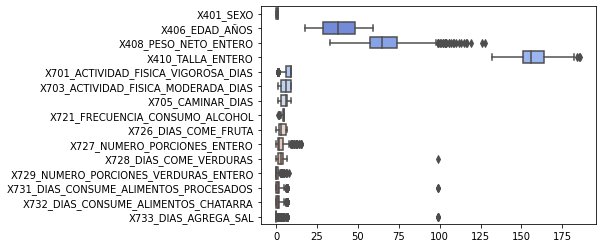

In [24]:
sns.boxplot(data=df, palette='coolwarm', orient='h')

Se puede observar que existen datos atípicos dentro de _X728_DIAS_COME_VERDURAS_, _X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS_ y _X733_DIAS_AGREGA_SAL_.Estos datos podrían afectar el outcome de nuestro modelo.

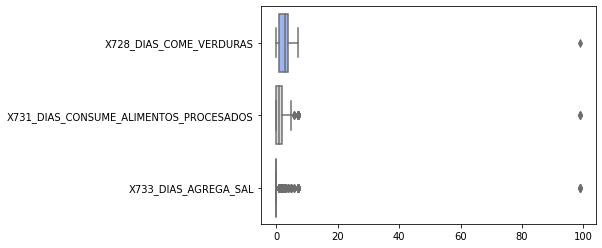

In [25]:
sns.boxplot(data=df[['X728_DIAS_COME_VERDURAS','X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS','X733_DIAS_AGREGA_SAL']], palette='coolwarm', orient='h')

Se saca la media de cada columna y se reemplaza en el valor atípico (que en los 3 casos sería el máximo) para que no influya negativamente en la salida de nuestro modelo.

In [26]:
df['X728_DIAS_COME_VERDURAS'] = df['X728_DIAS_COME_VERDURAS'].replace(df['X728_DIAS_COME_VERDURAS'].max(),df['X728_DIAS_COME_VERDURAS'].mean(axis=0,skipna=True).astype(int))
df['X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS'] = df['X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS'].replace(df['X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS'].max(),df['X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS'].mean(axis=0,skipna=True).astype(int))
df['X733_DIAS_AGREGA_SAL'] = df['X733_DIAS_AGREGA_SAL'].replace(df['X733_DIAS_AGREGA_SAL'].max(),df['X733_DIAS_AGREGA_SAL'].mean(axis=0,skipna=True).astype(int))


Revisión de los resultados

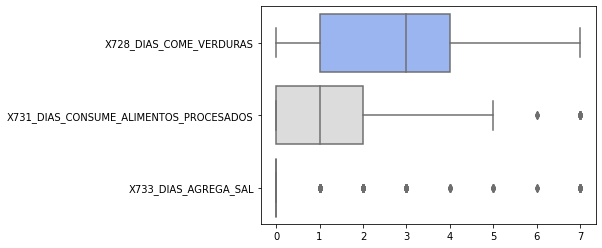

In [27]:
sns.boxplot(data=df[['X728_DIAS_COME_VERDURAS','X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS','X733_DIAS_AGREGA_SAL']], palette='coolwarm', orient='h')

Ahora sí se tiene una data más pareja

##Creación de dos nuevas columnas para conocer la frecuencia en la que se comen frutas y verduras



In [28]:
df['FRECUENCIA_FRUTA'] = df['X726_DIAS_COME_FRUTA'].map({0:0, 
                                                             1:1,
                                                             2:1,
                                                             3:1,
                                                             4:2,
                                                             5:2,
                                                             6:2,
                                                             7:3})

In [29]:
df['FRECUENCIA_VERDURA'] = df['X728_DIAS_COME_VERDURAS'].map({0:0, 
                                                             1:1,
                                                             2:1,
                                                             3:1,
                                                             4:2,
                                                             5:2,
                                                             6:2,
                                                             7:3})

Se eliminan las columnas que ya no son necesarias.

In [30]:
df.drop('X726_DIAS_COME_FRUTA',inplace=True,axis=1)

In [31]:
df.drop('X727_NUMERO_PORCIONES_ENTERO',inplace=True,axis=1)

In [32]:
df.drop('X728_DIAS_COME_VERDURAS',inplace=True,axis=1)

In [33]:
df.drop('X729_NUMERO_PORCIONES_VERDURAS_ENTERO',inplace=True,axis=1)

Este es el total de columnas hasta el momento

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   X401_SEXO                               1083 non-null   int64
 1   X406_EDAD_AÑOS                          1083 non-null   int64
 2   X408_PESO_NETO_ENTERO                   1083 non-null   int64
 3   X410_TALLA_ENTERO                       1083 non-null   int64
 4   X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS     1083 non-null   int64
 5   X703_ACTIVIDAD_FISICA_MODERADA_DIAS     1083 non-null   int64
 6   X705_CAMINAR_DIAS                       1083 non-null   int64
 7   X721_FRECUENCIA_CONSUMO_ALCOHOL         1083 non-null   int64
 8   X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS  1083 non-null   int64
 9   X732_DIAS_CONSUME_ALIMENTOS_CHATARRA    1083 non-null   int64
 10  X733_DIAS_AGREGA_SAL                    1083 non-null   int64
 11  FRECUENCIA_FRUTA 

##Cálculo del IMC de cada individuo en 3 meses



Cálculo de las calorías quemadas (ejercicio) y las calorías ganadas (comida)

In [35]:
quantity = len(df)

In [36]:
caloriasQuemadas=[]
for index in range(len(df)):
  value=0
  value+=df['X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS'][index]*374
  value+=df['X703_ACTIVIDAD_FISICA_MODERADA_DIAS'][index]*365
  value+=df['X705_CAMINAR_DIAS'][index]*314
  
  caloriasQuemadas.append(value)

In [37]:
print(caloriasQuemadas)

[5127, 6659, 5929, 8849, 7057, 4559, 4045, 2937, 4775, 3108, 7371, 7754, 6294, 5196, 4245, 6979, 2531, 4045, 4673, 4771, 4918, 1418, 4185, 4673, 3404, 6863, 4295, 6294, 2471, 4669, 3566, 4789, 8119, 4045, 5929, 6345, 8849, 9477, 8535, 6235, 2905, 5089, 4637, 6549, 2471, 8849, 5857, 7371, 5911, 5663, 7279, 7593, 5403, 7593, 3939, 6294, 4287, 3685, 5403, 4724, 6549, 5929, 8119, 3973, 6133, 8119, 8119, 8119, 6345, 4433, 6659, 6294, 4673, 6294, 3820, 6396, 6235, 6659, 8119, 7279, 3667, 8119, 8849, 6761, 8119, 7057, 7440, 5717, 8849, 4873, 6294, 8535, 7287, 6165, 6605, 8747, 8119, 6863, 6549, 8747, 5454, 8747, 8017, 7389, 8119, 5136, 7440, 5127, 8119, 3930, 3769, 6294, 6557, 5537, 5917, 6235, 6557, 6979, 8849, 5038, 6922, 6235, 7754, 5247, 6863, 1995, 7754, 3871, 3925, 8119, 8119, 6965, 5127, 5181, 6174, 6659, 6659, 5768, 6235, 3871, 3736, 7371, 8221, 8119, 4724, 7907, 5196, 5929, 5615, 4933, 6184, 6396, 5870, 3787, 6133, 8535, 6031, 8849, 6082, 6396, 1053, 7024, 8017, 9477, 4287, 7233, 853

In [38]:
caloriasGanadas=[]
for index in range(len(df)):
  value=0
  value+=df['X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS'][index]*508
  value+=df['X732_DIAS_CONSUME_ALIMENTOS_CHATARRA'][index]*600
  value+=df['FRECUENCIA_FRUTA'][index]*100
  value+=df['FRECUENCIA_VERDURA'][index]*51
  
  caloriasGanadas.append(value)

In [39]:
print(caloriasGanadas)

[961, 2926, 151, 1767, 2275, 4551, 1208, 100, 151, 1259, 1900, 1167, 1267, 608, 759, 2059, 951, 100, 200, 1167, 659, 751, 802, 710, 761, 300, 1800, 151, 751, 151, 659, 1167, 202, 151, 2669, 1926, 1369, 1116, 3159, 4126, 2183, 1259, 1859, 1767, 1108, 251, 1167, 1208, 1726, 0, 0, 351, 1926, 1053, 2202, 2002, 300, 151, 1002, 1451, 851, 808, 100, 100, 151, 351, 151, 2475, 1167, 1259, 151, 453, 802, 202, 151, 3169, 1767, 751, 1259, 1259, 5059, 3851, 1469, 1459, 7907, 1167, 3210, 2377, 710, 151, 4502, 1259, 151, 1310, 351, 1451, 2967, 759, 1053, 1318, 1951, 951, 151, 202, 453, 100, 151, 151, 2459, 1867, 151, 100, 100, 253, 761, 100, 300, 251, 351, 351, 1369, 302, 1167, 151, 751, 251, 202, 1551, 251, 559, 151, 251, 2469, 951, 1918, 1259, 1318, 402, 100, 1167, 1967, 751, 1318, 2069, 1053, 1410, 6483, 1259, 2459, 1267, 1875, 1318, 1767, 1269, 1867, 4726, 3526, 751, 3159, 4910, 302, 5618, 1459, 2602, 1053, 659, 1418, 2018, 802, 659, 700, 51, 2651, 810, 1167, 1259, 253, 2710, 1351, 1259, 3202, 12

Cálculo del IMC que tendrá cada individuo de acá a tres meses y se categoriza en si tendrán sobrepeso (1) o no (0)

In [40]:
IMCesperado=[]
for index in range(len(df)):
  newPeso=df['X408_PESO_NETO_ENTERO'][index]-(caloriasQuemadas[index]*21-caloriasGanadas[index])/7000
  value=newPeso/((df['X410_TALLA_ENTERO'][index]/100)**2)
  if value>25:
    IMCesperado.append(1)
  else:
    IMCesperado.append(0)
  

In [41]:
print(IMCesperado)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

###Creación de la columna IMCesperado

In [42]:
df['IMCesperado']=IMCesperado

In [43]:
df.head()

,X401_SEXO,X406_EDAD_AÑOS,X408_PESO_NETO_ENTERO,X410_TALLA_ENTERO,X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS,X703_ACTIVIDAD_FISICA_MODERADA_DIAS,X705_CAMINAR_DIAS,X721_FRECUENCIA_CONSUMO_ALCOHOL,X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS,X732_DIAS_CONSUME_ALIMENTOS_CHATARRA,X733_DIAS_AGREGA_SAL,FRECUENCIA_FRUTA,FRECUENCIA_VERDURA,IMCesperado
0,0,59,79,165,1,7,7,4,1,0,0,3,3,1
1,0,22,71,182,9,3,7,4,3,2,0,1,2,0
2,0,30,56,155,9,1,7,4,0,0,0,1,1,0
3,1,27,82,156,9,9,7,5,2,1,0,1,1,1
4,0,34,54,163,7,7,6,5,3,1,0,1,1,0


#Nuevo DataFrame

In [44]:
df.to_csv('dataclean.csv', index=False, na_rep='NaN')

In [45]:
df_clean=pd.read_csv('dataclean.csv')

In [46]:
df_clean.head()

,X401_SEXO,X406_EDAD_AÑOS,X408_PESO_NETO_ENTERO,X410_TALLA_ENTERO,X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS,X703_ACTIVIDAD_FISICA_MODERADA_DIAS,X705_CAMINAR_DIAS,X721_FRECUENCIA_CONSUMO_ALCOHOL,X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS,X732_DIAS_CONSUME_ALIMENTOS_CHATARRA,X733_DIAS_AGREGA_SAL,FRECUENCIA_FRUTA,FRECUENCIA_VERDURA,IMCesperado
0,0,59,79,165,1,7,7,4,1,0,0,3,3,1
1,0,22,71,182,9,3,7,4,3,2,0,1,2,0
2,0,30,56,155,9,1,7,4,0,0,0,1,1,0
3,1,27,82,156,9,9,7,5,2,1,0,1,1,1
4,0,34,54,163,7,7,6,5,3,1,0,1,1,0


In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   X401_SEXO                               1083 non-null   int64
 1   X406_EDAD_AÑOS                          1083 non-null   int64
 2   X408_PESO_NETO_ENTERO                   1083 non-null   int64
 3   X410_TALLA_ENTERO                       1083 non-null   int64
 4   X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS     1083 non-null   int64
 5   X703_ACTIVIDAD_FISICA_MODERADA_DIAS     1083 non-null   int64
 6   X705_CAMINAR_DIAS                       1083 non-null   int64
 7   X721_FRECUENCIA_CONSUMO_ALCOHOL         1083 non-null   int64
 8   X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS  1083 non-null   int64
 9   X732_DIAS_CONSUME_ALIMENTOS_CHATARRA    1083 non-null   int64
 10  X733_DIAS_AGREGA_SAL                    1083 non-null   int64
 11  FRECUENCIA_FRUTA 

#Modelado

##Data

Se separa la data de entrenamiento y testing en un 80 - 20%

In [48]:
train_df = df_clean.sample(frac = 0.8, random_state = 0)
test_df = df_clean.drop(train_df.index)

Se analiza la información de los conjuntos de datos de entrenamiento y prueba

In [49]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 204 to 166
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   X401_SEXO                               866 non-null    int64
 1   X406_EDAD_AÑOS                          866 non-null    int64
 2   X408_PESO_NETO_ENTERO                   866 non-null    int64
 3   X410_TALLA_ENTERO                       866 non-null    int64
 4   X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS     866 non-null    int64
 5   X703_ACTIVIDAD_FISICA_MODERADA_DIAS     866 non-null    int64
 6   X705_CAMINAR_DIAS                       866 non-null    int64
 7   X721_FRECUENCIA_CONSUMO_ALCOHOL         866 non-null    int64
 8   X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS  866 non-null    int64
 9   X732_DIAS_CONSUME_ALIMENTOS_CHATARRA    866 non-null    int64
 10  X733_DIAS_AGREGA_SAL                    866 non-null    int64
 11  FRECUENCIA_FRUTA 

In [50]:
train_df.describe()

,X401_SEXO,X406_EDAD_AÑOS,X408_PESO_NETO_ENTERO,X410_TALLA_ENTERO,X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS,X703_ACTIVIDAD_FISICA_MODERADA_DIAS,X705_CAMINAR_DIAS,X721_FRECUENCIA_CONSUMO_ALCOHOL,X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS,X732_DIAS_CONSUME_ALIMENTOS_CHATARRA,X733_DIAS_AGREGA_SAL,FRECUENCIA_FRUTA,FRECUENCIA_VERDURA,IMCesperado
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,0.565820,38.317552,66.884527,157.347575,7.189376,5.557737,5.397229,4.465358,1.233256,1.627021,0.412240,1.636259,1.299076,0.275982
std,0.495935,11.671599,14.121621,8.980543,2.919922,2.869334,2.422284,0.601982,1.434860,1.865577,1.273941,0.901137,0.849032,0.447266
min,0.000000,18.000000,33.000000,132.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.250000,57.000000,151.000000,6.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,38.000000,64.000000,157.000000,9.000000,6.000000,6.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,48.000000,74.000000,164.000000,9.000000,9.000000,7.000000,5.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,1.000000,59.000000,128.000000,186.000000,9.000000,9.000000,9.000000,5.000000,7.000000,7.000000,7.000000,3.000000,3.000000,1.000000


Se extraen las etiquetas con las que se va a entrenar el modelo.

In [51]:
train_labels = train_df.pop('IMCesperado')
test_labels = test_df.pop('IMCesperado')

##Estructura del modelo

In [52]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_df.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,  activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
                )
  return model

Se almacena el modelo en una variable

In [53]:
model = build_model()

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


##Entrenamiento y evaluación

In [55]:
BATCHSIZE = 100
EPOCHS = 100
num_train_df_examples = len(train_df)
num_test_df_examples = len(test_df)

Entrenamiento del modelo junto con sus etiquetas

In [56]:
model.fit(
    train_df, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0
)

In [57]:
test_labels

11      0
19      0
23      0
25      0
28      0
       ..
1062    0
1063    0
1070    1
1073    0
1079    0
Name: IMCesperado, Length: 217, dtype: int64

Evaluacion del porcentaje de perdida y precisión

In [58]:
loss, accuracy = model.evaluate(
    test_df, test_labels, verbose=2
)

print("Resultado en las pruebas: ", accuracy)

7/7 - 0s - loss: 0.2210 - accuracy: 0.9171 - 79ms/epoch - 11ms/step
Resultado en las pruebas:  0.9170507192611694


In [59]:
predictions = model.predict(test_df)

7/7 [==============================] - 0s 3ms/step


In [60]:
len(predictions)

217

In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 11 to 1079
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   X401_SEXO                               217 non-null    int64
 1   X406_EDAD_AÑOS                          217 non-null    int64
 2   X408_PESO_NETO_ENTERO                   217 non-null    int64
 3   X410_TALLA_ENTERO                       217 non-null    int64
 4   X701_ACTIVIDAD_FISICA_VIGOROSA_DIAS     217 non-null    int64
 5   X703_ACTIVIDAD_FISICA_MODERADA_DIAS     217 non-null    int64
 6   X705_CAMINAR_DIAS                       217 non-null    int64
 7   X721_FRECUENCIA_CONSUMO_ALCOHOL         217 non-null    int64
 8   X731_DIAS_CONSUME_ALIMENTOS_PROCESADOS  217 non-null    int64
 9   X732_DIAS_CONSUME_ALIMENTOS_CHATARRA    217 non-null    int64
 10  X733_DIAS_AGREGA_SAL                    217 non-null    int64
 11  FRECUENCIA_FRUTA 

##Testing

Se testea el modelo con un lote de 10 valores del dataset separado para el testing.

In [62]:
example_batch = train_df[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 44ms/step


array([[1.5495382e-07],
       [1.9204811e-09],
       [9.9999964e-01],
       [1.0557153e-05],
       [1.5117909e-07],
       [1.4765572e-05],
       [2.3324660e-04],
       [6.6528887e-02],
       [1.9068752e-07],
       [1.8989785e-10]], dtype=float32)

##Pruebas de uso

In [63]:
test_size = 5
predArr = [test_size]
for i in range(test_size):
  predArr.append(i)
#el orden de la data es sexo, edad, peso, talla, cantidad de dias que hace actividad física vigorosa, cantidad de dias que hace actividad fisica moderada, cantidad de dias que realiza caminatas en dias,
#frecuencia en la que consume de alcohol, cantidad de dias que consume alimentos procesados,cantidad de dias que consume comida chatarra, dias en los que agrega sal a sus comidas, frecuencia con la que consume fruta y
#frecuencia con la que consume verduras

predArr[0] = np.array([[0,	22,	75,	175,	7,	7,	7,	2, 5,	0, 0, 3, 3]])
predArr[1] = np.array([[1,	47,	65,	159,	6,	4,	7,	2, 2,	1, 2, 1, 1]])
predArr[2] = np.array([[1,	31,	53,	162,	5,	5,	6,	3, 3,	3, 3, 1, 2]])
predArr[3] = np.array([[0,	19,	78,	179,	6,	6,	7,	2, 3,	2, 2, 1, 2]])
predArr[4] = np.array([[1,	53,	86,	164,	2,	3,	4,	2, 6,	4, 4, 3, 3]])

predArr

[array([[  0,  22,  75, 175,   7,   7,   7,   2,   5,   0,   0,   3,   3]]),
 array([[  1,  47,  65, 159,   6,   4,   7,   2,   2,   1,   2,   1,   1]]),
 array([[  1,  31,  53, 162,   5,   5,   6,   3,   3,   3,   3,   1,   2]]),
 array([[  0,  19,  78, 179,   6,   6,   7,   2,   3,   2,   2,   1,   2]]),
 array([[  1,  53,  86, 164,   2,   3,   4,   2,   6,   4,   4,   3,   3]]),
 4]

In [64]:
def predFormat (x):
  answer = round((x[0][0]*100), 4)
  print("El individuo tiene una probabilidad del", answer,"% de tener sobrepeso en 3 meses." )

In [65]:
for i in range(test_size):
  predFormat(model.predict(pd.DataFrame(predArr[i])))

1/1 [==============================] - 0s 46ms/step
El individuo tiene una probabilidad del 0.0019 % de tener sobrepeso en 3 meses.
1/1 [==============================] - 0s 52ms/step
El individuo tiene una probabilidad del 0.2215 % de tener sobrepeso en 3 meses.
1/1 [==============================] - 0s 41ms/step
El individuo tiene una probabilidad del 0.0 % de tener sobrepeso en 3 meses.
1/1 [==============================] - 0s 38ms/step
El individuo tiene una probabilidad del 0.0029 % de tener sobrepeso en 3 meses.
1/1 [==============================] - 0s 40ms/step
El individuo tiene una probabilidad del 99.9999 % de tener sobrepeso en 3 meses.


#EXPORTACION DEL MODELO

In [66]:
model.save('tf.h5')

In [67]:
!ls

database.csv  dataclean.csv  sample_data  tf.h5


In [68]:
!mkdir carpeta_out

In [70]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.3 MB/s 
     |████████████████████████████████| 578.0 MB 9.6 kB/s 
     |████████████████████████████████| 185 kB 51.6 MB/s 
     |████████████████████████████████| 16.0 MB 2.0 MB/s 
     |████████████████████████████████| 40 kB 4.3 MB/s 
     |████████████████████████████████| 237 kB 34.1 MB/s 
     |████████████████████████████████| 145 kB 52.7 MB/s 
     |████████████████████████████████| 51 kB 5.5 MB/s 
     |████████████████████████████████| 1.7 MB 29.4 MB/s 
     |████████████████████████████████| 5.9 MB 38.3 MB/s 
     |████████████████████████████████| 438 kB 43.0 MB/s 
     |████████████████████████████████| 85 kB 3.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  At

In [71]:
!tensorflowjs_converter --input_format keras tf.h5 carpeta_out

2022-11-08 14:04:11.348918: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-08 14:04:12.742614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-08 14:04:12.743755: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-08 14:04:12.743812: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make su

In [72]:
!ls carpeta_out

group1-shard1of1.bin  model.json
